# Plotting data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_paris = pd.read_csv('example_data/Paris_1_256_map.csv').set_index("agents_count")
df_paris.tail()

,success_count_cbs,time_cbs,flowtime_cbs,makespan_cbs,SIC_cbs,success_count_cbs_ds,time_cbs_ds,flowtime_cbs_ds,makespan_cbs_ds,SIC_cbs_ds,success_count_ecbs_30,time_ecbs_30,flowtime_ecbs_30,makespan_ecbs_30,SIC_ecbs_30,success_count_ecbs_179,time_ecbs_179,flowtime_ecbs_179,makespan_ecbs_179,SIC_ecbs_179
agents_count,,,,,,,,,,,,,,,,,,,,
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,50.709,35647,552,552,True,52.210,35647,552,552
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,50.678,35778,552,552,True,52.237,35778,552,552
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,51.651,36116,552,552,True,52.299,36116,552,552
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,53.829,36519,552,552,True,54.817,36519,552,552
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,54.393,36777,552,552,True,55.927,36777,552,552


In [4]:
df_empty = pd.read_csv('example_data/empty-48-48_map.csv').set_index("agents_count")
df_room = pd.read_csv('example_data/room-64-64-16_map.csv').set_index("agents_count")
df_warehouse = pd.read_csv('example_data/warehouse-20-40-10-2-2_map.csv').set_index("agents_count")

In [5]:
def plot_success_count(df: pd.DataFrame, title: str='', ax=None):
    cols = [col for col in df.columns if col.startswith('success_count')]
    cols_to_plot = df[cols].rename(columns=lambda x: x.replace('success_count_','')).sum()
    if ax is None:
        ax = plt.gca()
    cols_to_plot.plot(kind='bar', title=title, rot=0)
    return ax

def plot_numerical_data(df: pd.DataFrame, prefix: str, title: str = '', ax=None):
    cols = sorted([col for col in df.columns if col.startswith(prefix)], reverse=True)
    cols_to_plot = df[cols].rename(columns=lambda x: x.replace(prefix + '_',''))
    if ax is None:
        ax = plt.gca()
    cols_to_plot.plot(figsize=(10,6), ylabel=prefix, title=title)
    return ax

In [6]:
def plot_all(df: pd.DataFrame):
    # fig, axs = plt.subplots(2, 2, figsize=(24, 12))
    plot_success_count(df, 'Number of tests for which algorithm was able to find the solution in fixed time')
    plot_numerical_data(df, 'time', 'Running time of the algorithm')
    plot_numerical_data(df, 'flowtime', 'Total number of actions performed by each of the agents until they reach their goal')
    plot_numerical_data(df, 'makespan', 'Number of time steps until the last agent stops moving')


1. agents_count - number of agents
2. success_count - number of tests (among tasks_count input files) for which algorihm was able to find the solution in fixed time.
3. makespan - number of time steps until the last agent stops moving (average)
4. flowtime - total number of actions performed by each of the agents until they reach their goal positions (average)
5. time - running time of the algorithm  (average)

## Paris map

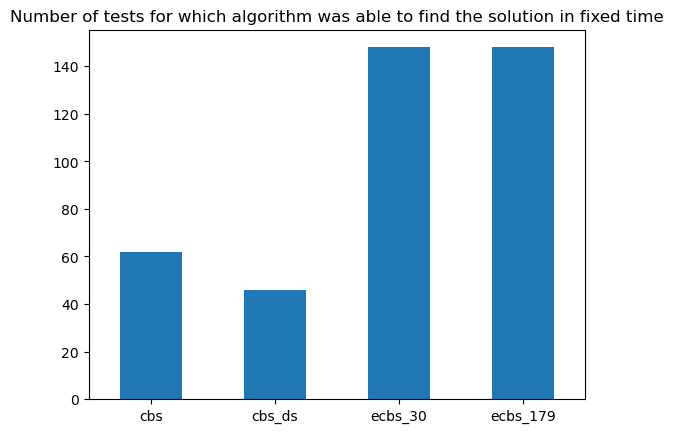

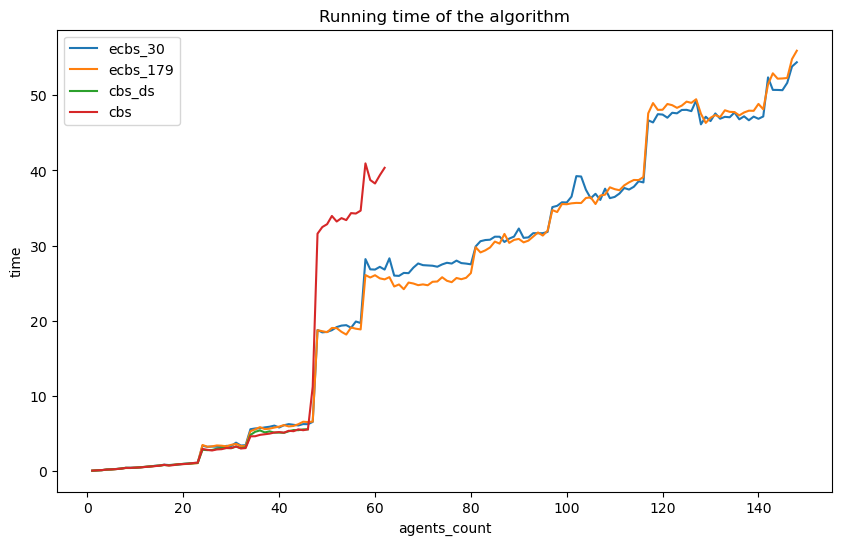

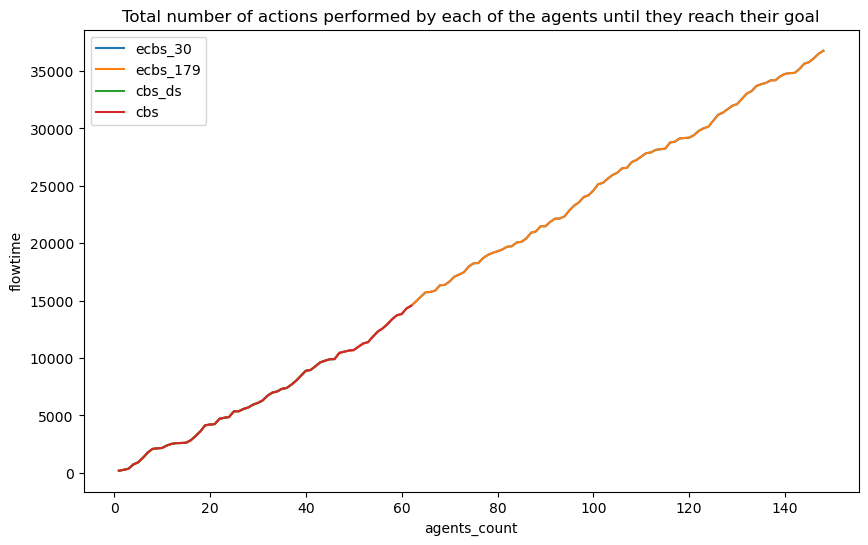

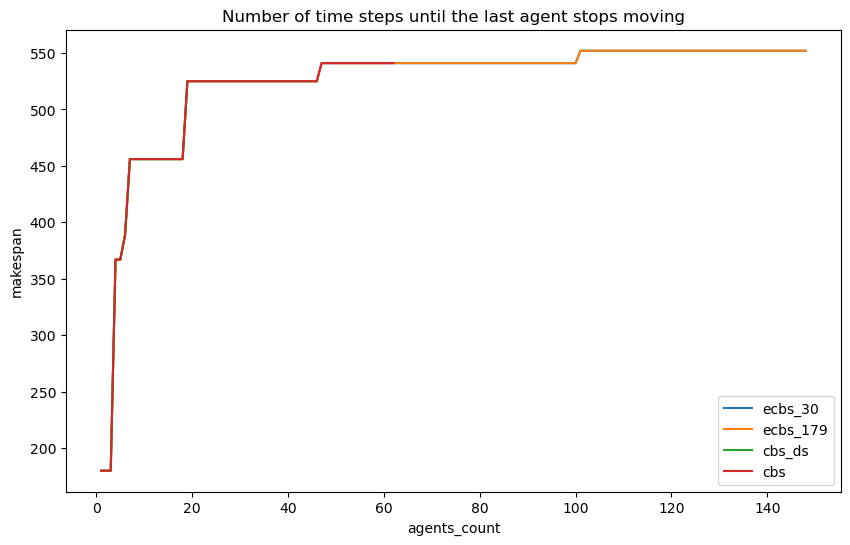

In [7]:
plot_all(df_paris)

## Empty map

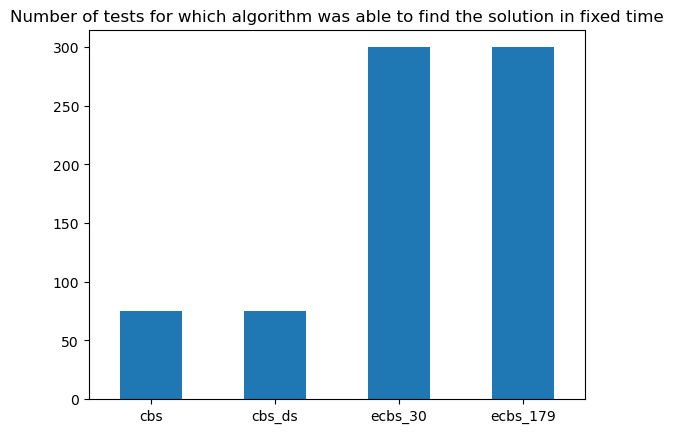

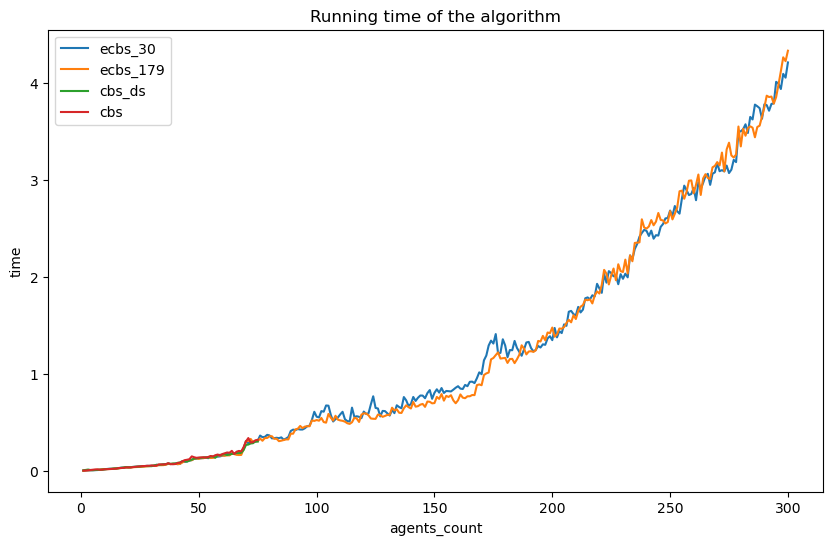

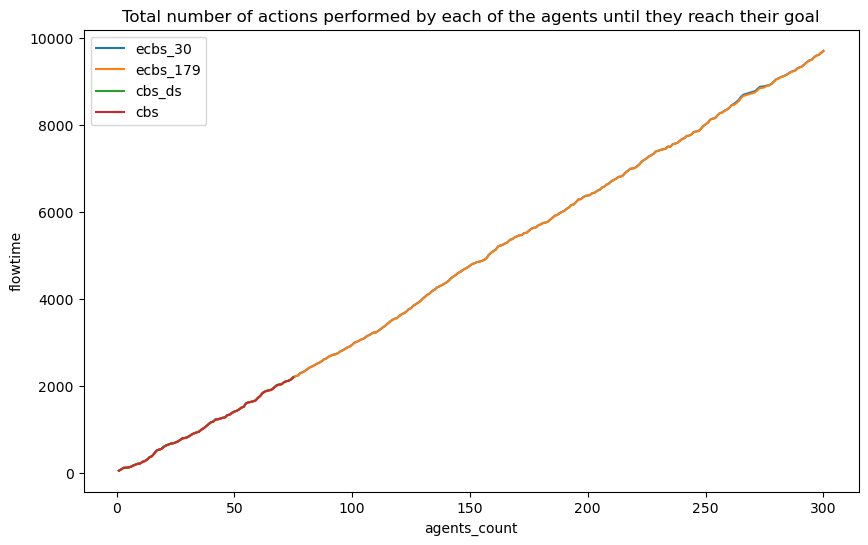

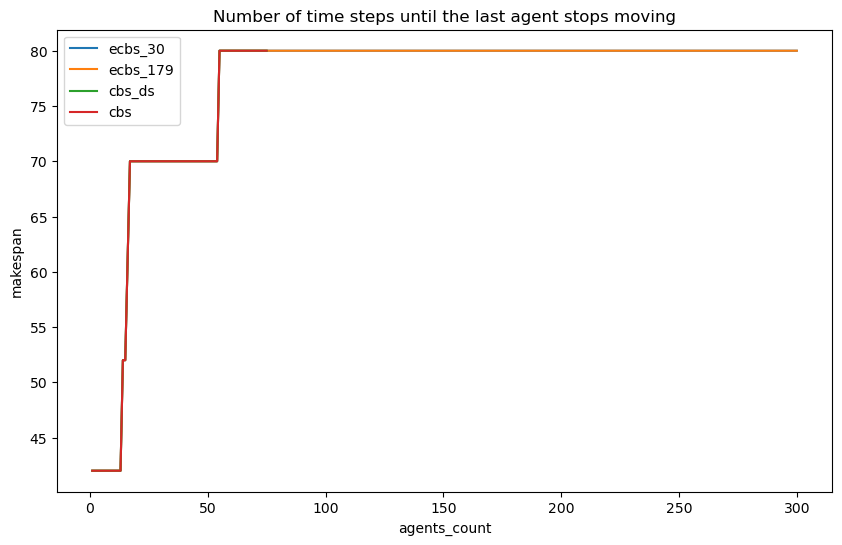

In [8]:
plot_all(df_empty)

## Room map

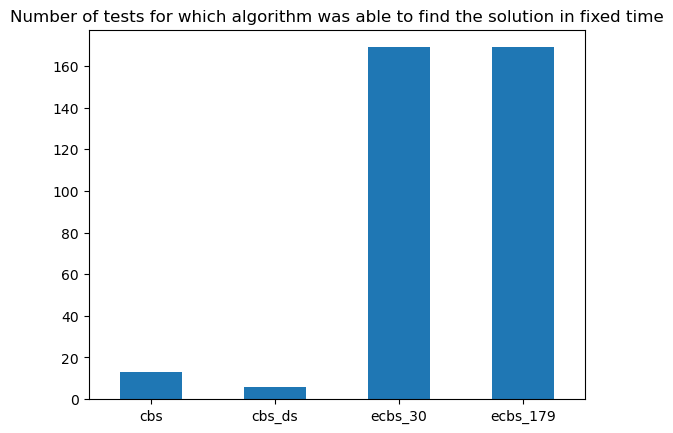

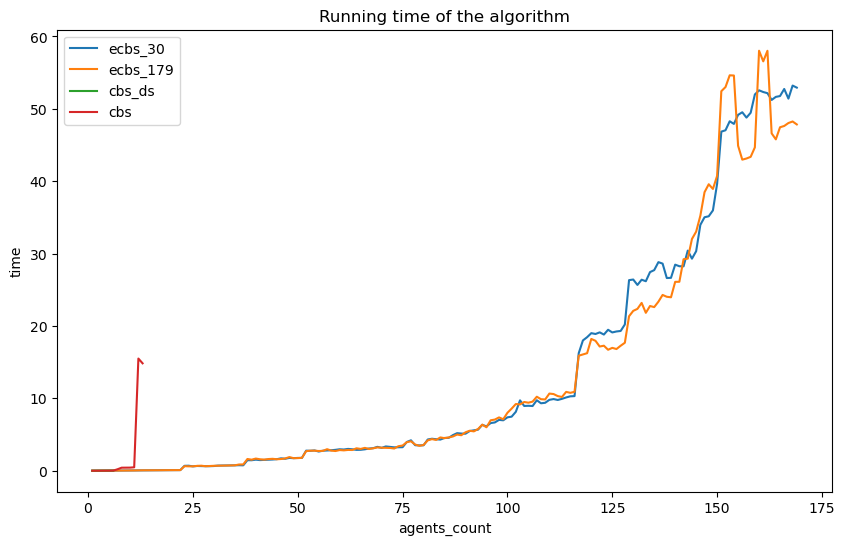

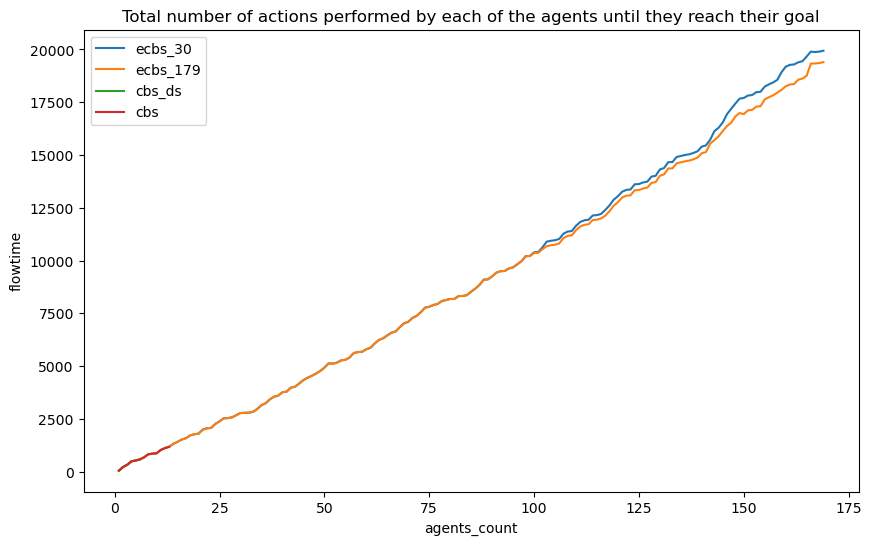

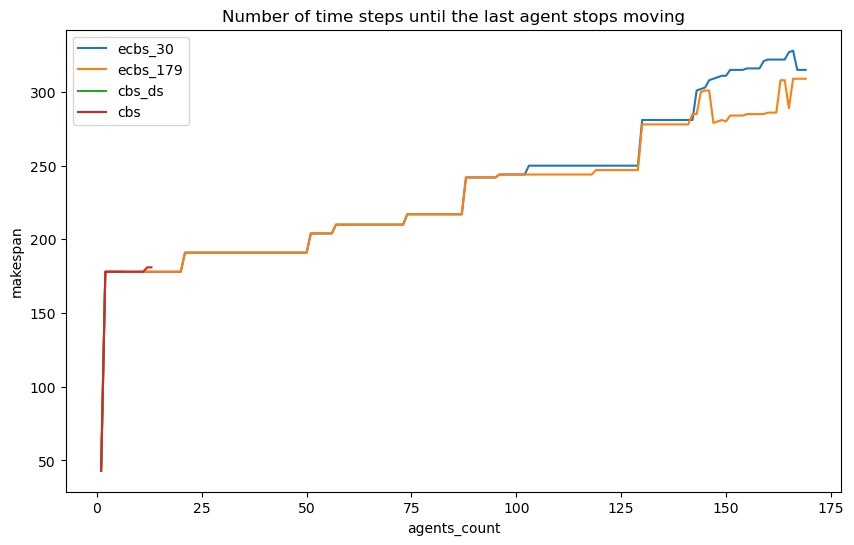

In [9]:
plot_all(df_room)

## Warehouse map

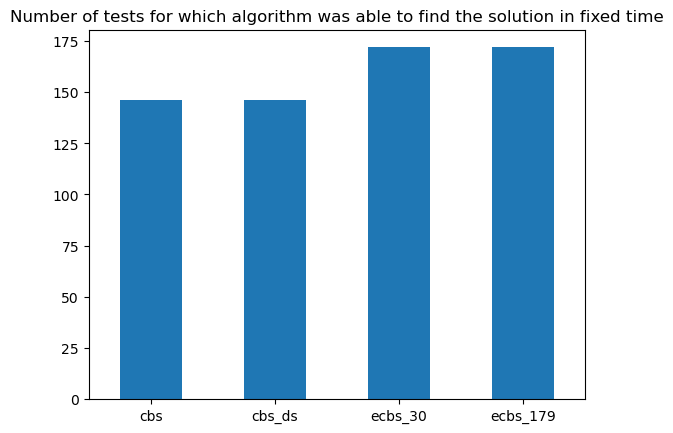

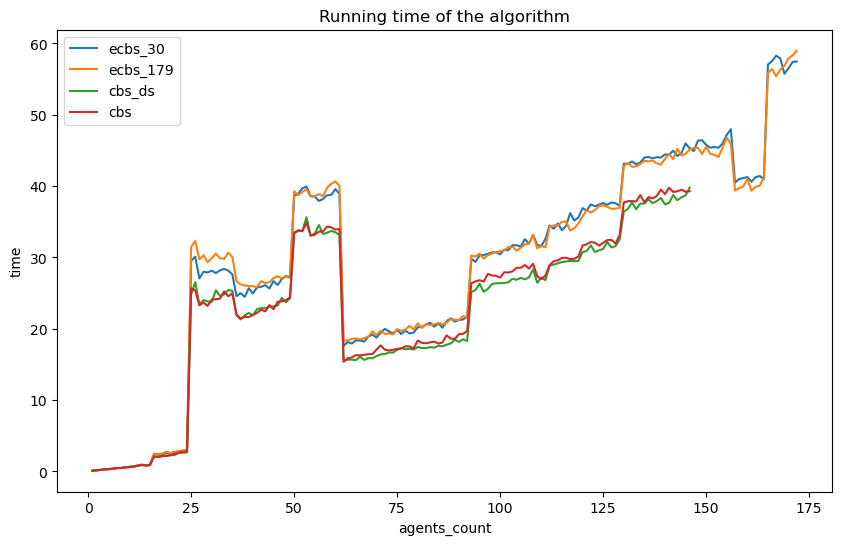

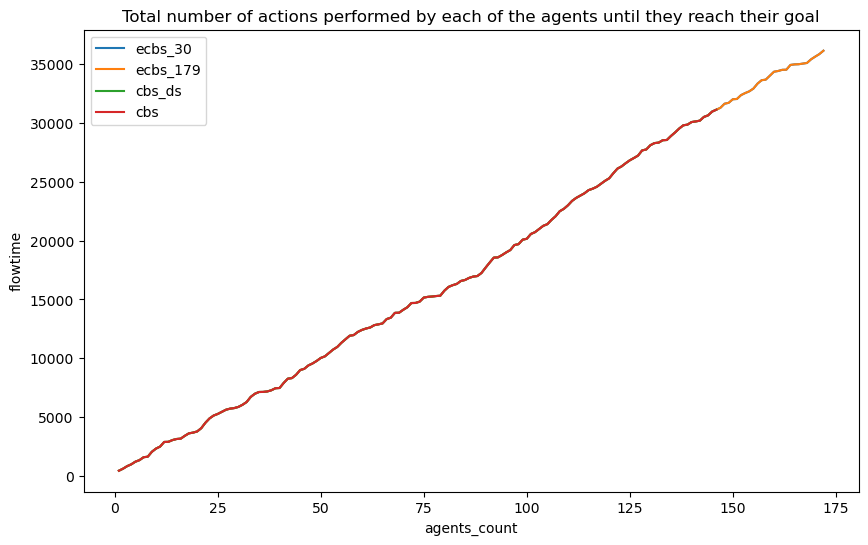

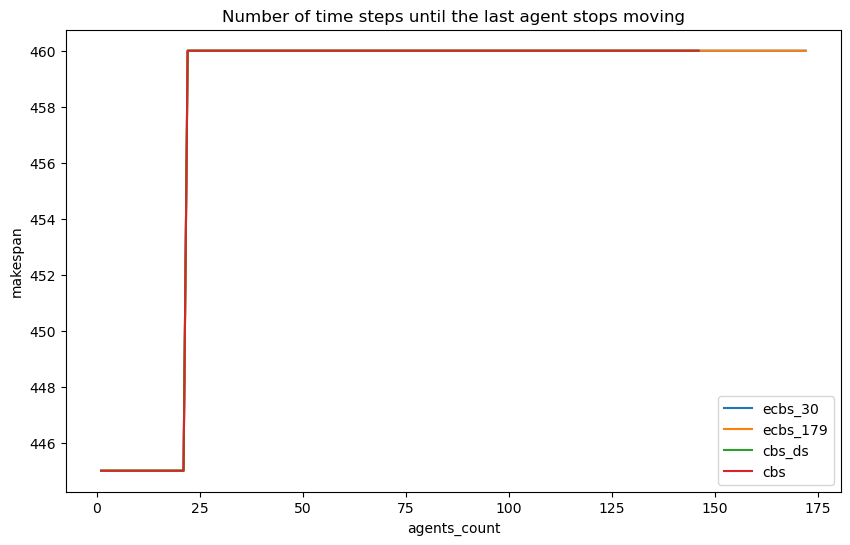

In [10]:
plot_all(df_warehouse)